#Data import

In [29]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import color
from skimage import io
import os 
from sklearn.model_selection import train_test_split

In [2]:
import os
import urllib.request
class DataFetch(object): 
  def __init__(self):
    self.DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Barcelona-Technology-School/InnoSpark-edir/main/"
  
  def fetch_csv(self, folder, file_name):
    
      if not os.path.isdir(folder):
        os.makedirs(folder)
      csv_path = os.path.join(folder,file_name)
      URL = self.DOWNLOAD_ROOT + folder + file_name
      urllib.request.urlretrieve(URL, csv_path)

      return csv_path

  def fetch_data(self, folder, file_names):
    if not os.path.isdir(folder):
        os.makedirs(folder)

    for file_name in tqdm(file_names):
      URL= self.DOWNLOAD_ROOT + folder + file_name
      file_path = os.path.join(folder,file_name)

      try:
        urllib.request.urlretrieve(URL, file_path)
      except:
        continue
      

##Kaggle 

https://www.kaggle.com/andrewmvd/ocular-disease-recognition-odir5k

In [3]:
#! rm -r "Datasets"

In [4]:
folder='Datasets/Kaggle/'
file_name = 'full_df.csv'
csv_path = DataFetch().fetch_csv(folder, file_name)

In [5]:
df = pd.read_csv(csv_path)

In [6]:
df_gl=df.copy()
df_ct=df.copy()
df_dr=df.copy()
df_hyp=df.copy()

In [7]:
def has_disease(text, dis): 
  if dis in text: 
    return 1
  else: 
    return 0

In [8]:
df_gl["left_glau"] = df_gl["Left-Diagnostic Keywords"].apply(lambda x: has_disease(x,'glauc'))
df_gl["right_glau"] = df_gl["Right-Diagnostic Keywords"].apply(lambda x: has_disease(x,'glauc'))
df_ct["left_cat"] = df_ct["Left-Diagnostic Keywords"].apply(lambda x: has_disease(x,'cataract'))
df_ct["right_cat"] = df_ct["Right-Diagnostic Keywords"].apply(lambda x: has_disease(x,'cataract'))
df_dr["left_dr"] = df_dr["Left-Diagnostic Keywords"].apply(lambda x: has_disease(x,'diabet'))
df_dr["right_dr"] = df_dr["Right-Diagnostic Keywords"].apply(lambda x: has_disease(x,'diabet'))
df_hyp["left_hyp"] = df_hyp["Left-Diagnostic Keywords"].apply(lambda x: has_disease(x,'hyper'))
df_hyp["right_hyp"] = df_hyp["Right-Diagnostic Keywords"].apply(lambda x: has_disease(x,'hyper'))

In [9]:
left_glau = df_gl.loc[(df_gl.G ==1) & (df_gl.left_glau == 1)]["Left-Fundus"].values
right_glau = df_gl.loc[(df_gl.G ==1) & (df_gl.right_glau == 1)]["Right-Fundus"].values
left_cat = df_ct.loc[(df_ct.C ==1) & (df_ct.left_cat == 1)]["Left-Fundus"].values
right_cat = df_ct.loc[(df_ct.C ==1) & (df_ct.right_cat == 1)]["Right-Fundus"].values
left_dr = df_dr.loc[(df_dr.D ==1) & (df_dr.left_dr == 1)]["Left-Fundus"].values
right_dr = df_dr.loc[(df_dr.D ==1) & (df_dr.right_dr == 1)]["Right-Fundus"].values
left_hyp = df_hyp.loc[(df_hyp.H ==1) & (df_hyp.left_hyp == 1)]["Left-Fundus"].values
right_hyp = df_hyp.loc[(df_hyp.H ==1) & (df_hyp.right_hyp == 1)]["Right-Fundus"].values

In [ ]:
# len(df_dr[df_dr['Left-Diagnostic Keywords'].str.contains('diabe')])
# df_dr[df_dr['labels'].str.contains('D')]
# df_dr[df_dr['D']==1]

In [10]:
print(left_glau.shape)
print(right_glau.shape)
print(left_cat.shape)
print(right_cat.shape)
print(left_dr.shape)
print(right_dr.shape)
print(left_hyp.shape)
print(right_hyp.shape)

(332,)
(284,)
(304,)
(290,)
(85,)
(80,)
(191,)
(191,)


In [11]:
glau1_file_names = np.concatenate((left_glau,right_glau),axis=0)
print(glau1_file_names.shape)
cat1_file_names = np.concatenate((left_cat,right_cat),axis=0)
print(cat1_file_names.shape)
dr1_file_names = np.concatenate((left_dr,right_dr),axis=0)
print(dr1_file_names.shape)
hyp_file_names = np.concatenate((left_hyp,right_hyp),axis=0)
print(hyp_file_names.shape)

(616,)
(594,)
(165,)
(382,)


In [12]:
folder='Datasets/Kaggle/preprocessed_images/'
DataFetch().fetch_data(folder, glau1_file_names)

100%|██████████| 616/616 [01:08<00:00,  9.01it/s]


In [39]:
folder='Datasets/Kaggle/preprocessed_images/'
DataFetch().fetch_data(folder, cat1_file_names)

100%|██████████| 594/594 [01:07<00:00,  8.81it/s]


In [48]:
folder='Datasets/Kaggle/preprocessed_images/'
DataFetch().fetch_data(folder, dr1_file_names)

100%|██████████| 165/165 [00:19<00:00,  8.54it/s]


In [65]:
folder='Datasets/Kaggle/preprocessed_images/'
DataFetch().fetch_data(folder, hyp_file_names)

100%|██████████| 382/382 [00:44<00:00,  8.64it/s]


##ORIGA

Glaucoma images

https://drive.google.com/drive/folders/1VPCvVsPgrfPNIl932xgU3XC_WFLUsXJR

In [13]:
folder='Datasets/ORIGA/'
file_name = 'imgNamesORIGA.csv'
csv_path = DataFetch().fetch_csv(folder, file_name)

In [14]:
csv_path

'Datasets/ORIGA/imgNamesORIGA.csv'

In [15]:
df = pd.read_csv(csv_path)

In [16]:
df.head()

,Unnamed: 0,Original names,New names
0,0,001.jpg,Im0001_ORIGA.jpg
1,1,002.jpg,Im0002_ORIGA.jpg
2,2,003.jpg,Im0003_ORIGA.jpg
3,3,004.jpg,Im0004_ORIGA.jpg
4,4,005.jpg,Im0005_ORIGA.jpg


In [17]:
glau2_file_names = []
for file_name in df["New names"]:
   glau2_file_names.append(file_name)
print(len(glau2_file_names))

650


In [18]:
folder='Datasets/ORIGA/glaucoma/'
DataFetch().fetch_data(folder, glau2_file_names)

100%|██████████| 650/650 [01:34<00:00,  6.86it/s]


##Kaggle2

Cataract images

https://www.kaggle.com/jr2ngb/cataractdataset

In [32]:
folder='Datasets/Kaggle2/'
file_name = 'kaggle2Cataract.csv'
csv_path = DataFetch().fetch_csv(folder, file_name)

In [33]:
df = pd.read_csv(csv_path)

In [34]:
df.head()

,name
0,cataract_001.png
1,cataract_002.png
2,cataract_003.png
3,cataract_004.png
4,cataract_005.png


In [35]:
cat2_file_names = []
for file_name in df["name"]:
   cat2_file_names.append(file_name)
print(len(cat2_file_names))

100


In [36]:
folder='Datasets/Kaggle2/2_cataract/'
DataFetch().fetch_data(folder, cat2_file_names)

100%|██████████| 100/100 [00:33<00:00,  2.98it/s]


##Messidor

DR images

http://www.adcis.net/en/third-party/messidor2/

In [49]:
folder='Datasets/8-Messidor/'
file_name = 'messidor_data.csv'
csv_path = DataFetch().fetch_csv(folder, file_name)

In [50]:
df = pd.read_csv(csv_path)

In [51]:
df.head()

,image_id,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable
0,20051020_43808_0100_PP.png,0.0,0.0,1
1,20051020_43832_0100_PP.png,1.0,0.0,1
2,20051020_43882_0100_PP.png,1.0,0.0,1
3,20051020_43906_0100_PP.png,2.0,1.0,1
4,20051020_44261_0100_PP.png,0.0,0.0,1


In [52]:
df_mess = df.loc[df['adjudicated_dr_grade']!=0].copy()

In [53]:
dr2_file_names = []
for file_name in df_mess["image_id"]:
   dr2_file_names.append(file_name)
print(len(dr2_file_names))

731


In [54]:
folder='Datasets/8-Messidor/DR/'
DataFetch().fetch_data(folder, dr2_file_names)

100%|██████████| 731/731 [02:37<00:00,  4.63it/s]


#Glaucoma

In [19]:
def read_images(path, file_names):
    ROW=224
    COL=224
    image_data = []
    
    for image_name in tqdm(file_names):
        
        try:
            #image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.imread(os.path.join(path,image_name))
            image = cv2.resize(image,(ROW,COL))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image_data.append(image)
        except:
            continue

    image_data = np.array(image_data)
    
    return image_data

##Kaggle

613 glaucoma fundus images

In [21]:
path = 'Datasets/Kaggle/preprocessed_images/'
image_glau1 = read_images(path,glau1_file_names)
image_glau1.shape

100%|██████████| 616/616 [00:03<00:00, 191.67it/s]


(613, 224, 224, 3)

##ORIGA

162 glaucoma fundus images

In [ ]:
#! rm -r Datasets

In [22]:
path = 'Datasets/ORIGA/glaucoma'
image_glau2 = read_images(path,glau2_file_names)
image_glau2.shape

100%|██████████| 650/650 [00:12<00:00, 50.13it/s]


(168, 224, 224, 3)

##Merge Glaucoma

In [23]:
print(image_glau1.shape)
print(image_glau2.shape)

(613, 224, 224, 3)
(168, 224, 224, 3)


In [24]:
glaucoma_images = np.concatenate((image_glau1, image_glau2), axis=0)
glaucoma_images.shape

(781, 224, 224, 3)

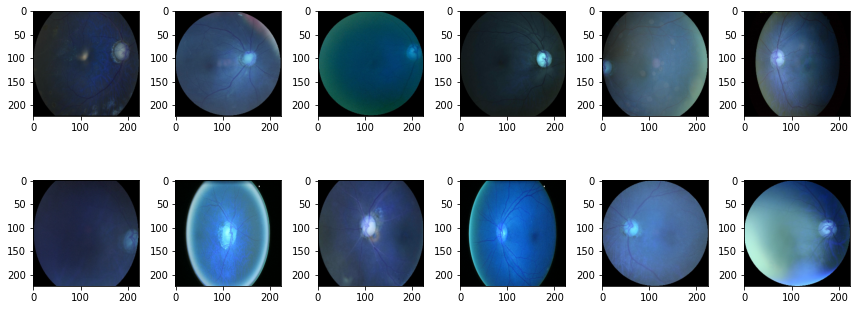

In [30]:
plt.figure(figsize=(12,5))
for i in range(12):
    sample = random.choice(range(len(glaucoma_images)))
    image = glaucoma_images[sample]
    plt.subplot(2,6,i+1)
    plt.imshow(image)
    #plt.xlabel(label)
plt.tight_layout() 

#Cataract

##Kaggle

In [40]:
cat1_file_names[0]
cat1_file_names.shape

(594,)

In [41]:
path = 'Datasets/Kaggle/preprocessed_images'
image_cata1 = read_images(path,cat1_file_names)
image_cata1.shape

100%|██████████| 594/594 [00:03<00:00, 170.28it/s]


(588, 224, 224, 3)

##Kaggle2

In [42]:
path = 'Datasets/Kaggle2/2_cataract'
image_cata2 = read_images(path,cat2_file_names)
image_cata2.shape

100%|██████████| 100/100 [00:08<00:00, 11.47it/s]


(100, 224, 224, 3)

##Merge Cataract


In [43]:
print(image_cata1.shape)
print(image_cata2.shape)

(588, 224, 224, 3)
(100, 224, 224, 3)


In [44]:
cataract_images = np.concatenate((image_cata1, image_cata2), axis=0)
cataract_images.shape

(688, 224, 224, 3)

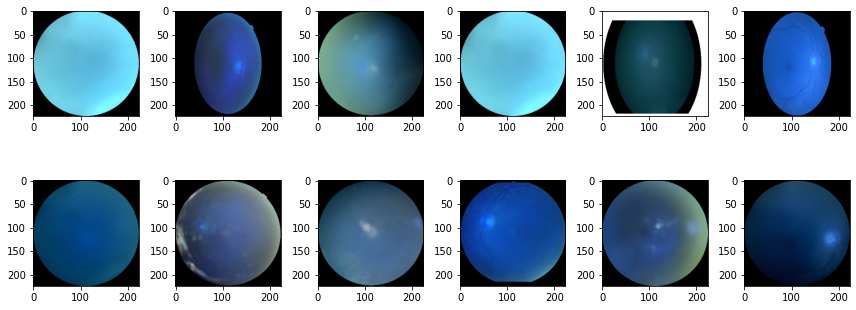

In [47]:
plt.figure(figsize=(12,5))
for i in range(12):
    sample = random.choice(range(len(cataract_images)))
    image = cataract_images[sample]
    plt.subplot(2,6,i+1)
    plt.imshow(image)
    #plt.xlabel(label)
plt.tight_layout() 

#Diabetic Retinopathy

##Kaggle

In [56]:
path = 'Datasets/Kaggle/preprocessed_images'
image_dr1 = read_images(path,dr1_file_names)
image_dr1.shape

100%|██████████| 165/165 [00:00<00:00, 194.34it/s]


(159, 224, 224, 3)

##Messidor

Used files Images001 and Images002.

Import Images003 and Images004 for more images

In [61]:
path = 'Datasets/8-Messidor/DR/'
image_dr2 = read_images(path,dr2_file_names)
image_dr2.shape

100%|██████████| 731/731 [00:18<00:00, 38.47it/s]


(316, 224, 224, 3)

##Merge Diabetic Retinopaty

In [62]:
print(image_dr1.shape)
print(image_dr2.shape)

(159, 224, 224, 3)
(316, 224, 224, 3)


In [63]:
dr_images = np.concatenate((image_dr1, image_dr2), axis=0)
dr_images.shape

(475, 224, 224, 3)

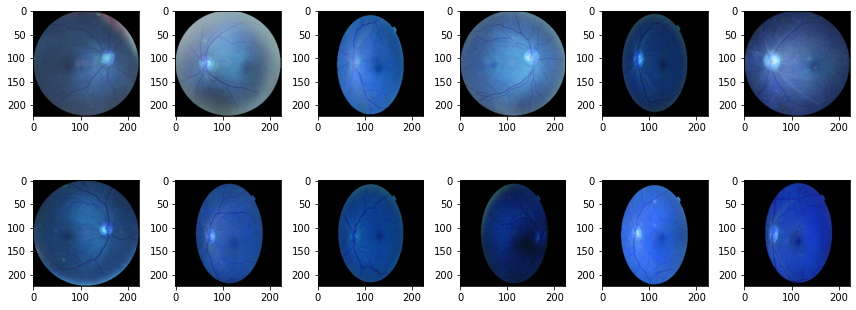

In [64]:
plt.figure(figsize=(12,5))
for i in range(12):
    sample = random.choice(range(len(dr_images)))
    image = dr_images[sample]
    plt.subplot(2,6,i+1)
    plt.imshow(image)
    #plt.xlabel(label)
plt.tight_layout() 

#Hypertension

##Kaggle

In [66]:
path = 'Datasets/Kaggle/preprocessed_images'
image_hyp1 = read_images(path,hyp_file_names)
image_hyp1.shape

100%|██████████| 382/382 [00:02<00:00, 185.61it/s]


(381, 224, 224, 3)

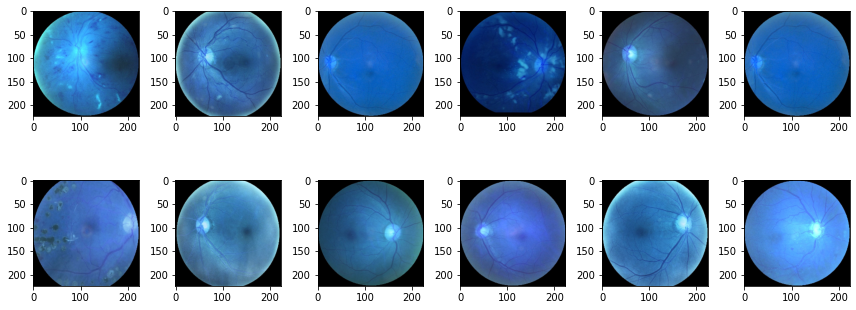

In [67]:
plt.figure(figsize=(12,5))
for i in range(12):
    sample = random.choice(range(len(image_hyp1)))
    image = image_hyp1[sample]
    plt.subplot(2,6,i+1)
    plt.imshow(image)
    #plt.xlabel(label)
plt.tight_layout() 